In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import itertools
import os

C:\Users\SACHIN\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
data = pd.read_csv("J:/ANN_on_KERAS/4_Case Study_ Keras/creditcarddefault.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# removing the customer id and name and saving the dependent varaibles 1n x
x = data.iloc[:,1:24].values

# saving the independent variable in y
y = data.iloc[:,24].values

print(x)
print(y)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]
[1 1 0 ... 1 1 1]


In [9]:
x.shape

(30000, 23)

In [10]:
from sklearn.cross_validation import train_test_split

# splitting the data in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


C:\Users\SACHIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# scaling the data using the preprocessing library 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\SACHIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
x_train[:1]

array([[ 0.48238852,  0.81447304,  0.18907673,  0.86211952, -0.48921975,
        -0.87463676, -0.72347864, -0.6983838 , -0.66637051,  0.23416564,
         0.25233359, -0.63042993, -0.63367788, -0.6645842 , -0.51248219,
        -0.57038965,  0.39521137, -0.0821721 , -0.22758026,  0.33473587,
        -0.28260403,  3.38918769, -0.15149706]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# STEP 1:  initializing our model
class_model_keras = Sequential()

In [15]:
# 1st HIDDEN LAYER
class_model_keras.add(Dense(input_dim = 23, output_dim = 12, init = 'uniform', activation = 'relu'))

# 2nd Hidden Layer 
# as the input dim to this layer is the output from the previous layer 
# we need not explicitly specify it here
class_model_keras.add(Dense(output_dim = 12, init = 'uniform', activation = 'relu'))

# OUTPUT LAYER
# sigmoid activation is used to get the outout between 0 and 1.
class_model_keras.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\SACHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=23, activation="relu", units=12, kernel_initializer="uniform")`
  
C:\Users\SACHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=12, kernel_initializer="uniform")`
  import sys
C:\Users\SACHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [16]:
# STEP 3: COMPILING THE NEURAL NETWORK
# In this step we have the liberty to choose the optimization method we would like to use 
# the loss fucntion and the metrics that we require ad outpur
# binary_crossentropy loss function used when a binary output is expected

class_model_keras.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [17]:
class_model_keras.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\SACHIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
21000/21000 [==============================] - 8s 362us/step - loss: 0.5452 - acc: 0.7801
Epoch 2/100
21000/21000 [==============================] - 6s 274us/step - loss: 0.5259 - acc: 0.7802
Epoch 3/100
21000/21000 [==============================] - 6s 305us/step - loss: 0.5212 - acc: 0.7802
Epoch 4/100
21000/21000 [==============================] - 7s 312us/step - loss: 0.4792 - acc: 0.7935
Epoch 5/100
21000/21000 [==============================] - 5s 256us/step - loss: 0.4539 - acc: 0.8108
Epoch 6/100
21000/21000 [==============================] - 6s 293us/step - loss: 0.4496 - acc: 0.8139
Epoch 7/100
21000/21000 [==============================] - 6s 280us/step - loss: 0.4455 - acc: 0.8194
Epoch 8/100
21000/21000 [==============================] - 6s 262us/step - loss: 0.4435 - acc: 0.8200
Epoch 9/100
21000/21000 [==============================] - 6s 286us/step - loss: 0.4425 - acc: 0.8191
Epoch 10/100
21000/21000 [==============================] - 6s 265us/step - loss: 

21000/21000 [==============================] - 5s 241us/step - loss: 0.4232 - acc: 0.8225
Epoch 81/100
21000/21000 [==============================] - 5s 215us/step - loss: 0.4231 - acc: 0.8220
Epoch 82/100
21000/21000 [==============================] - 4s 208us/step - loss: 0.4227 - acc: 0.8221
Epoch 83/100
21000/21000 [==============================] - 4s 214us/step - loss: 0.4231 - acc: 0.8219
Epoch 84/100
21000/21000 [==============================] - 5s 232us/step - loss: 0.4228 - acc: 0.8228
Epoch 85/100
21000/21000 [==============================] - 4s 212us/step - loss: 0.4232 - acc: 0.8216
Epoch 86/100
21000/21000 [==============================] - 4s 205us/step - loss: 0.4230 - acc: 0.8225
Epoch 87/100
21000/21000 [==============================] - ETA: 0s - loss: 0.4225 - acc: 0.821 - 5s 238us/step - loss: 0.4225 - acc: 0.8214
Epoch 88/100
21000/21000 [==============================] - 5s 215us/step - loss: 0.4227 - acc: 0.8217
Epoch 89/100
21000/21000 [======================

In [18]:
y_pred =  class_model_keras.predict_proba(x_test)

In [19]:
pred = (y_pred> 0.5)

In [20]:
target_names = [ 'no', 'yes']
# code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

Confusion matrix, without normalization
[[6572  408]
 [1199  821]]


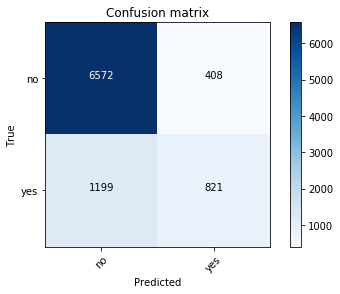

In [21]:
# Formulating the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure()
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

In [22]:
scores = class_model_keras.evaluate(x_test,y_test)

print("\nACCURACY: %.2f%%" % (scores[1]*100))

9000/9000 [==============================] - 1s 65us/step

ACCURACY: 82.14%
